# Data Analysis of Movie Ratings Data

#### Xu Han

### Overview
This reports includes three data science tools, hypothesis testing, regression and machine learning. This notebooks will have following parts:

1. Data Description
2. Package import
3. Hypothesis testing - Hypothesis testing of movie ratings data
4. Regression - Correlation and Regression of Movie Ratings Data
5. Machine Learning - Applying machine learning methods to movie ratings data

### 1. Dataset description

This dataset features ratings data of 400 movies from 1097 research participants. 

* 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
* Row 2-1098: Responses from individual participants
* Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
* Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)
* Columns 422-464: These columns contain responses to personality questions (1-5)
* Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
* Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
* Column 476: Only child (1 = yes, 0 = no, -1 = no response)
* Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

### 2. Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data
data = pd.read_csv('movieReplicationSet.csv')
data.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


### 3. Hypothesis testing - Hypothesis testing of movie ratings data
In this section, we will ask several questions about the data and build null and alternative hypothesis to anwer our questions.

**Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?**
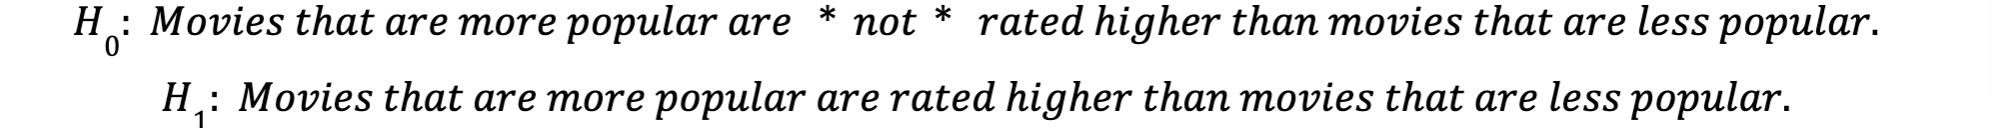

In [3]:
#Gather the threshold used to distinguish popular and unpopular movies
threshold_popular = data.iloc[:, : 400].notnull().sum().median()

#The algorithm here is to take median of each movie and compare two groups of medians
popular, unpoplular = [], [] #Create a list used to store medians of two types of movies

for movie in data.iloc[:, : 400].columns:
    if data[movie].notnull().sum()\
    >= threshold_popular: popular.append(data[movie].median())
    else: unpoplular.append(data[movie].median())
        
#U test
#Use 'greater' since we want to see if median of one group 
#is larger than thta of another group
U, p = stats.mannwhitneyu(x=popular, y=unpoplular, alternative = 'greater') 

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 33427.5. The p value is: 9.929258851707232e-35, we reject the null hypothesis.


**Are movies that are newer rated differently than movies that are older?**
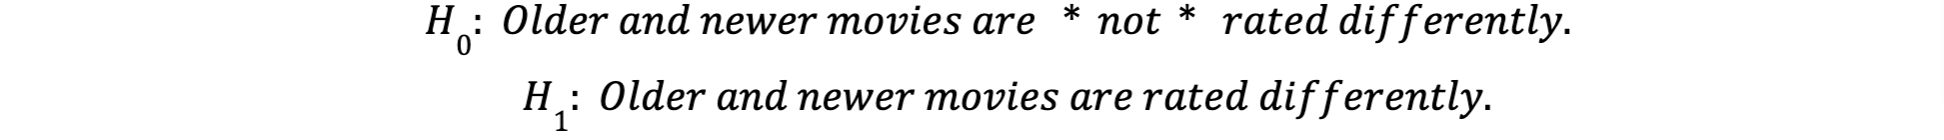

In [4]:
#Use a median split of year of release to contrast movies in terms of 
#whether they are old or new
#Gather the threshold used to distinguish old and new movies
years = []
for name in data.iloc[:, : 400].columns:
    years.append(int(name.split('(')[-1].split(')')[0]))

ValueError: invalid literal for int() with base 10: 'Rambo: First Blood Part II'

We are missing year of movie 'Rambo: First Blood Part II'. We searched the year of this movie and it is 1985. Fill year 1985 in the column name.

In [5]:
data = data.rename(
columns = {'Rambo: First Blood Part II': 'Rambo: First Blood Part II (1985)'})

In [6]:
years = []
for name in data.iloc[:, : 400].columns:
    years.append(int(name.split('(')[-1].split(')')[0]))
    
threshold_old_new = statistics.median(years)

old_movies, new_movies = [], []

for movie in data.iloc[:, : 400].columns:
    if int(movie.split('(')[-1].split(')')[0])\
    <= threshold_old_new: old_movies.append(data[movie].median())
    else: new_movies.append(data[movie].median())
        
U, p = stats.mannwhitneyu(x=old_movies, y=new_movies, alternative='two-sided')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 18263.0. The p value is: 0.19865156776112602, we accept the null hypothesis.


**Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?**
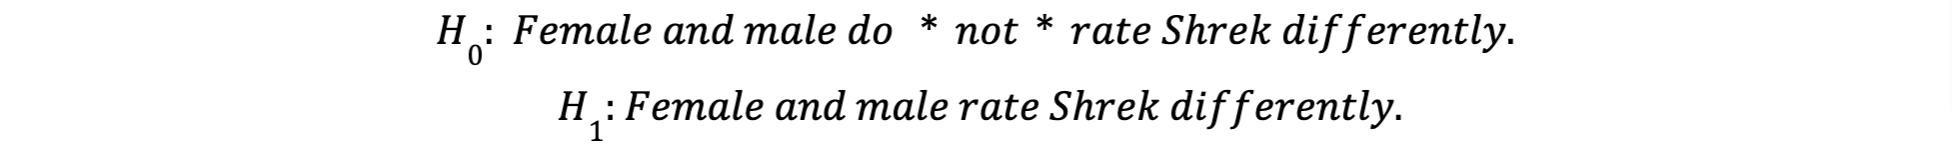

In [7]:
U, p = stats.mannwhitneyu(
    data['Shrek (2001)'].dropna()\
    [data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1], 
    data['Shrek (2001)'].dropna()\
    [data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2],
    alternative='two-sided')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 96830.5. The p value is: 0.050536625925559006, we accept the null hypothesis.


**What proportion of movies are rated differently by male and female viewers?**

In [8]:
diff_gender = 0
for movie in data.iloc[:, : 400].columns:
    U, p = stats.mannwhitneyu(
        data[movie]\
        [data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1].dropna(), 
        data[movie]\
        [data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2].dropna(),
        alternative='two-sided')
    
    if p <= 0.005: diff_gender += 1
        
print(diff_gender / 400)

0.125


**Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?**
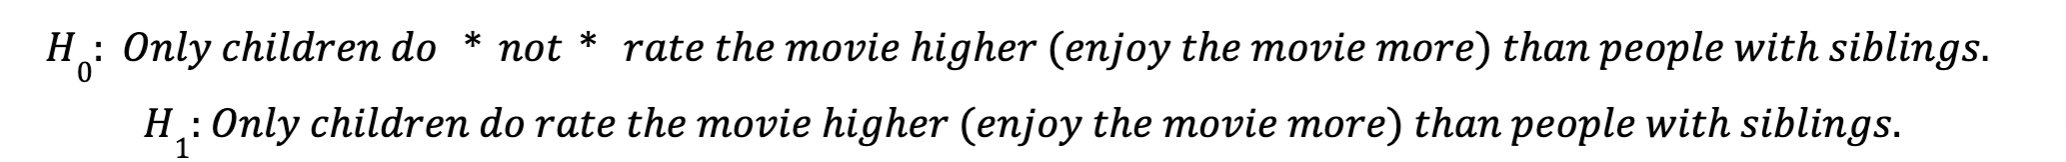

In [9]:
U, p = stats.mannwhitneyu(
    x=data['The Lion King (1994)']\
    [data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==1].dropna(),
    y=data['The Lion King (1994)']\
    [data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==0].dropna(),
    alternative = 'greater')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 52929.0. The p value is: 0.978419092554931, we accept the null hypothesis.


**What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?**

In [10]:
diff_sib = 0
for movie in data.iloc[:, : 400].columns:
    stat, p = stats.mannwhitneyu(
        data[movie]\
        [data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].dropna(), 
        data[movie]\
        [data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].dropna(),
        alternative = 'two-sided'
        )
    
    if p <= 0.005: diff_sib += 1
        
print(diff_sib / 400)

0.0175


**Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?**
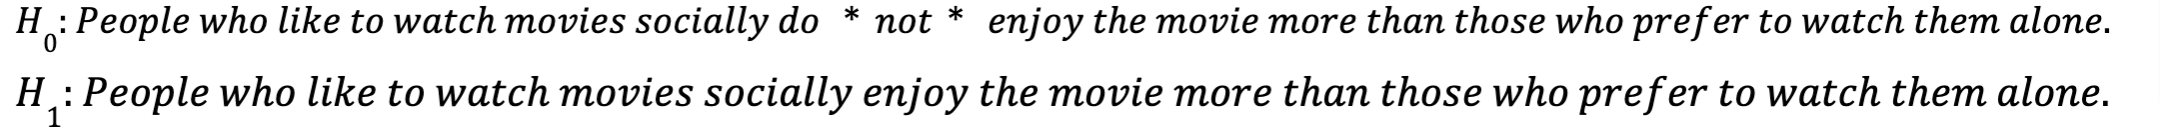

In [11]:
U, p = stats.mannwhitneyu(
    x=data['The Wolf of Wall Street (2013)']\
    [data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]\
    .dropna(),
    y=data['The Wolf of Wall Street (2013)']\
    [data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]\
    .dropna(),
    alternative = 'greater')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 49303.5. The p value is: 0.9436657996253056, we accept the null hypothesis.


**What proportion of movies exhibit such a “social watching” effect?**

In [12]:
diff_social = 0
for movie in data.iloc[:, : 400].columns:
    stat, p = stats.mannwhitneyu(
         x=data[movie]\
        [data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]\
        .dropna(),
         y=data[movie]\
        [data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]\
        .dropna(),
         alternative = 'greater')
    
    if p <= 0.005: diff_social += 1
        
print(diff_social / 400)

0.015


**Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?**

In [13]:
dff = pd.DataFrame()
dff['Home Alone (1990)']= data['Home Alone (1990)']
dff['Finding Nemo (2003)'] = data['Finding Nemo (2003)']
dff = dff.dropna()

In [14]:
#W test
W, p = stats.wilcoxon(dff.T.iloc[0], 
                       dff.T.iloc[1],
                      alternative='two-sided')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The W-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The W-statistics is 49303.5. The p value is: 3.909649173523774e-17, we reject the null hypothesis.


**There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?**

To compare several groups, we should be using the Kruskal test. However, the assumption of the Kruskal test is that samples are independent of each other. Thus, we first selected participants who only have watched one of the movies in each franchise, then dropped missing values element wise and applied the Kruskal test.

In [15]:
#Get names of franchises
Franchises = ['Star Wars',
 'Harry Potter',
 'The Matrix',
 'Indiana Jones',
 'Jurassic Park',
 'Pirates of the Caribbean',
 'Toy Story',
 'Batman']

In [16]:
#Writing supplementary functions to help us process the data
def slicing_movies(franchise, data): #Slice ratings of movies in one franchise
    ratings = pd.DataFrame() 
    for movie in data.columns:
        if franchise in movie:
            ratings[movie] = data[movie] 
    return ratings.T

#Collect data where a participant only watched ONE movie in each franchise
def watch_one(ratings): 
    only_one = pd.DataFrame()
    for column in ratings.columns:
        if ratings[column].isna().sum() == len(ratings) - 1 :
            only_one[column] = ratings[column]
    return only_one

In [17]:
#Star Wars
s = watch_one(slicing_movies('Star Wars', data))
K, p = stats.kruskal(s.iloc[0].dropna(),
                    s.iloc[1].dropna(),
                     s.iloc[2].dropna(),
                    s.iloc[3].dropna(),
                    s.iloc[4].dropna(),
                    s.iloc[5].dropna())
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.01754510804840347
Reject null hypothesis? : False


In [18]:
#Harry Potter
h = watch_one(slicing_movies('Harry Potter', data))
K, p = stats.kruskal(h.iloc[0].dropna(),
                    h.iloc[1].dropna(),
                     h.iloc[2].dropna(),
                    s.iloc[3].dropna())
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.9310454039574234
Reject null hypothesis? : False


In [19]:
#The Matrix
m = watch_one(slicing_movies('The Matrix', data))
K, p = stats.kruskal(m.iloc[0].dropna(),
                    m.iloc[1].dropna(),
                     m.iloc[2].dropna(),
                   
                    )
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.00047387428766348184
Reject null hypothesis? : True


In [20]:
#Indiana Jones
i = watch_one(slicing_movies('Indiana Jones', data))
K, p = stats.kruskal(i.iloc[0].dropna(),
                    i.iloc[1].dropna(),
                     i.iloc[2].dropna(),
                   i.iloc[3].dropna()
                    )
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.009247708069683698
Reject null hypothesis? : False


In [21]:
#Jurassic Park
j = watch_one(slicing_movies('Jurassic Park', data))
K, p = stats.kruskal(j.iloc[0].dropna(),
                    j.iloc[1].dropna(),
                     j.iloc[2].dropna(),
                    )
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.009186357878984034
Reject null hypothesis? : False


In [22]:
#Pirates of the Caribbean
pi = watch_one(slicing_movies('Pirates of the Caribbean', data))
K, p = stats.kruskal(pi.iloc[0].dropna(),
                    pi.iloc[1].dropna(),
                     pi.iloc[2].dropna(),
                   
                    )
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.07905185028117613
Reject null hypothesis? : False


In [23]:
#Toy Story
t = watch_one(slicing_movies('Toy Story', data))
K, p = stats.kruskal(t.iloc[0].dropna(),
                    t.iloc[1].dropna(),
                     t.iloc[2].dropna(),
                   
                    )
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.16220919765127276
Reject null hypothesis? : False


In [24]:
#Batman
b = watch_one(slicing_movies('Batman', data))
K, p = stats.kruskal(b.iloc[0].dropna(),
                    b.iloc[1].dropna(),
                     b.iloc[2].dropna(),
                   
                    )
print(p)
print("Reject null hypothesis? : " + str(p <= 0.005))

0.0004009970753882204
Reject null hypothesis? : True


P-value's above imply that The Matrix and Batman do not have the consistency in ratings. 


**In this part we will try to figure out which horror movie is "better" to the audience. Here we define a "good" horror movie as "the emotions on the screen 'rub off' on me".**

We choose The Shining (1980) and Scream (1996) in this test.

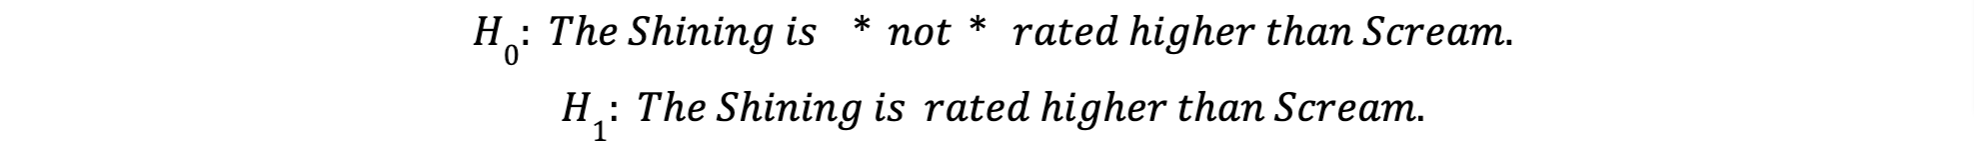

In [25]:
shining = data[['The Shining (1980)', 
'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared']
              ].dropna()

scream = data[['Scream (1996)', 
'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared']
              ].dropna()

U, p = stats.mannwhitneyu(
    x = shining.iloc[:,:1],
    y= scream.iloc[:,:1],
    alternative = 'greater')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 98794.0. The p value is: 3.2675792792966066e-10, we reject the null hypothesis.


In [26]:
U, p = stats.mannwhitneyu(
    x = shining.iloc[:,:0],
    y= scream.iloc[:,:0],
    alternative = 'greater')   
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is -101025.0. The p value is: 1.0, we reject the null hypothesis.


In [27]:
scream = data[['Scream (1996)', 
'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared']
              ].dropna()

In [28]:
U, p = stats.mannwhitneyu(
    x = shining.iloc[:,:1],
    y= scream.iloc[:,:1],
    alternative = 'greater')

if p <= 0.005: s = ', we reject the null hypothesis.'
else: s = ', we accept the null hypothesis.'
    
print('The U-statistics is ' + str(U) + '. The p value is: ' + str(p) + s)

The U-statistics is 98794.0. The p value is: 3.2675792792966066e-10, we reject the null hypothesis.


### 4. Regression - Correlation and Regression of Movie Ratings Data

**For every user in the given data, find the most correlated user, the pair of the most correlated users in the data and the value of this highest correlation.**

**Note:** For all missing values in the data, use the average of the corresponding column so to fill in the missing data. 

Under **the most correlated**, we consider the largest correlation in the absolute value.

In [29]:
#Reload the dataset since we use a different method to deal with missing values
movie = pd.read_csv('movieReplicationSet.csv') 
#Filling missing values with median of corresponding column
for col in movie.columns:
        movie[col].fillna(value=movie[col].mean(), inplace=True)

In [30]:
#Compute the correlation matrix which indicates the correlation between each users
correlations = abs(np.corrcoef(movie.iloc[:,0:400]))
#We iterate each row and find the second largest coefficient since the highest correlation
#in each row is 1, which means each user is most correlated with his/her/themselves. 
most_corr_users = correlations.argsort()[:,-2]

In [31]:
#Print the most correlated user for each user
df = pd.DataFrame(most_corr_users)
df.T

,0,1,2,3,4,5,6,7,8,9,...,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
0,118,831,896,19,784,990,1071,1074,821,1004,...,1048,818,352,896,896,896,784,896,896,710


In [32]:
#Loop through the entire matrix to find the largest coefficient aka the most correlated user
most_corrs = []

for i in range(len(most_corr_users)):
    most_corrs.append(correlations[i][most_corr_users[i]])

max_corr = max(most_corrs)

pair_max_corr = most_corrs.index(max_corr), most_corr_users[most_corrs.index(max_corr)]

print('The pair of the most correlated users in the data is ' + str(pair_max_corr[0]) +\
      ' and ' +
                                                                   str(pair_max_corr[1]) + '.')
print('And the correlation is ' + str(max_corr) + '.')

The pair of the most correlated users in the data is 896 and 831.
And the correlation is 0.9987890924779805.


**In the following section, we want to find a model between the ratings and the personal part of the data.**

To do so, consider:
1. the ratings of all users over columns 1-400, call this part `df_rate`.
2. the part of the data which includes all users over columns 401-474,call this part `df_pers`.

Our main task is to model `df_pers = function(df_rate)` by using the linear regression, ridge regression and lasso, and tune hyperparameters by evaluating the errors on the training part and the testing part.  

For ridge regression, we choose hyperparamter values alpha from [0.0, 1e-8, 1e-5, 0.1, 1, 10]. For lasso regression, we pick lambda from [1e-3, 1e-2, 1e-1, 1]. 

**Note:** Split the original data into training and testing as the ratio 0.80: 0.20. 

**Note**: Ignore any `convergence warning` in case you may obtain in the Lasso regression.

In [33]:
#Slicing data
df_rate = movie.iloc[:,0:400]
df_pers = movie.iloc[:,400:474]

In [34]:
#Linear Regression

#Initiate linear regression
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_rate, 
                                                    df_pers, 
                                                    test_size=0.2,
                                                   random_state=42)
#Fit the model
lr.fit(X_train, y_train)

#error on the training set
mean_squared_error(y_train,
                   lr.predict(X_train))

#error on the test set
mean_squared_error(y_test, 
                   lr.predict(X_test))

3.250964771485102

Before building models, we first splitted data into training and test sets with weight 0.2. Using packages from sklearn, we ran the linear regression by using training data to fit the model and made predictions based on training data and test data separately. To be more specific, the error is mean squared error (MSE.) MSE on training data is 0.6168057282756675 and on test data is 3.2563832850152368. 

[0.6127612374234509, 0.612761237423451, 0.6127612374246642, 0.6128675474638947, 0.6176596189954013, 0.6681063711453809] [3.2509647714851337, 3.2509647623208684, 3.250955607294819, 3.166127659797688, 2.718440736635627, 1.893212275643257]


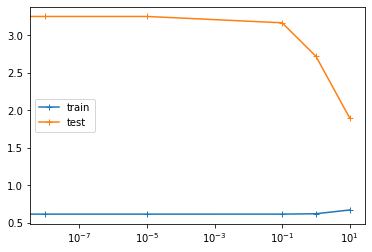

In [35]:
#Ridge Regression

#Initiate hyparameters
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]
#Store train and test error
train_error, test_error = [], []

#Initiate ridge regression and loop through each alpha
for alpha in alphas:
    clf = Ridge(alpha=alpha) 
    clf.fit(X_train, y_train) #Fit the model 
    pers_train_predict = clf.predict(X_train) #Predict on train set
    pers_test_predict = clf.predict(X_test) #Predict on test set 
    
    train_error.append(mean_squared_error(y_train, pers_train_predict)) 
    test_error.append(mean_squared_error(y_test,pers_test_predict ))

#Print errors
print(train_error,test_error) 

#Visualization
plt.plot(alphas, train_error, '-+', label='train')
plt.plot(alphas, test_error,'-+', label='test')
plt.xscale('log')

plt.legend();

[0.6359078007727818, 0.8932351906143894, 1.210230986955849, 1.2261539571148226] [2.280496045757267, 1.3742334226815167, 1.2534246581541626, 1.2646356285936624]


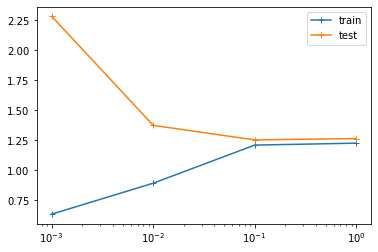

In [36]:
#LASSO

#Initiate hyparameters
lbds = [1e-3, 1e-2, 1e-1, 1]
#Store train and test error
train_error_lasso, test_error_lasso = [], []

#Initiate LASSO and loop through each lambda
for lbd in lbds:
    lasso = Lasso(alpha=lbd)
    lasso.fit(X_train, y_train) #Fit the model 
    pers_train_predict = lasso.predict(X_train) #Predict on train set
    pers_test_predict = lasso.predict(X_test) #Predict on test set 
    train_error_lasso.append(mean_squared_error(y_train, pers_train_predict))
    test_error_lasso.append(mean_squared_error(y_test,pers_test_predict ))

#Print errors
print(train_error_lasso,test_error_lasso) 

#Visualization
plt.plot(lbds, train_error_lasso, '-+', label='train')
plt.plot(lbds, test_error_lasso,'-+', label='test')
plt.xscale('log')

plt.legend();

To calculate the MSE on ridge and lasso, we followed the same recipe for linear regression but the only difference is we introduced the parameter. For both ridge and lasso, we calculated MSE with each alpha and stored the numbers in arrays train_error and test_error. Finally, we drew plots to help us visualize which  made the model have the smallest MSE, which is also how we chose the best. 

From the first line graph, ridge MSE on test data is minimum when alpha = 10, and we chose  = 10. Similarly, when = 0.1, lasso MSE reached the lowest value and we chose lamdba = 0.1.

### 5. Machine Learning - Applying machine learning methods to movie ratings data

**Apply dimension reduction methods – specifically a PCA – to the data in columns 421-474. As laid out
above, these columns contain self-report answers to personality and how these individuals
experience movies, respectively. We will determine the number of factors (principal components) and interpret what those factors represent.**

In [37]:
#Data Processing
data = pd.read_csv('movieReplicationSet - Copy.csv')
personality = data.iloc[:,420:474]

#Filling data with median and center the data set aka. mean = 0
for col in personality.columns:
    if personality[col].isna().sum() != 0:
        personality[col] = personality[col].fillna(personality[col].median())
    personality[col] -= personality[col].mean()
    
personality.head() 

,Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,-2.385597,-1.140383,-0.048314,1.229717,0.396536,1.602552,-1.834093,-0.287147,2.083865,-3.168642,...,-0.909754,1.26618,-1.654512,-1.767548,2.90155,-0.230629,0.542388,0.74567,1.686418,-1.156791
1,-1.385597,-0.140383,-0.048314,-1.770283,-0.603464,1.602552,-0.834093,0.712853,0.083865,-1.168642,...,1.090246,0.26618,-1.654512,0.232452,-2.09845,-1.230629,1.542388,0.74567,-0.313582,-0.156791
2,0.614403,-1.140383,-0.048314,-0.770283,-0.603464,-0.397448,0.165907,0.712853,-0.916135,-0.168642,...,0.090246,0.26618,-1.654512,2.232452,0.90155,0.769371,0.542388,0.74567,0.686418,1.843209
3,1.614403,-0.140383,0.951686,1.229717,1.396536,-0.397448,0.165907,-2.287147,-0.916135,0.831358,...,0.090246,-1.73382,-1.654512,0.232452,-2.09845,-1.230629,-0.457612,0.74567,-0.313582,-1.156791
4,0.614403,0.859617,-0.048314,1.229717,-1.603464,-0.397448,0.165907,0.712853,-0.916135,-0.168642,...,0.090246,0.26618,1.345488,-0.767548,-0.09845,-0.230629,0.542388,1.74567,0.686418,1.843209


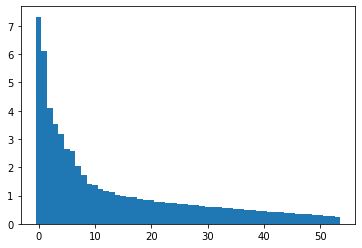

<Figure size 360x360 with 0 Axes>

In [38]:
#Initiate PCA
pca = PCA()
#Fit the model
pca.fit(personality)
#Plot the explained variance (eigenvalue of the covariance matrix)
plt.bar(np.arange(len(pca.explained_variance_)),
        pca.explained_variance_,
       width = 1);
plt.figure(figsize=(5,5));

 In the figure above, we plotted the variance and used the elbow method to determine the number of principal components. We observed that there is a large gap between the second and the third variance; therefore, we chose to keep the first two principal components.

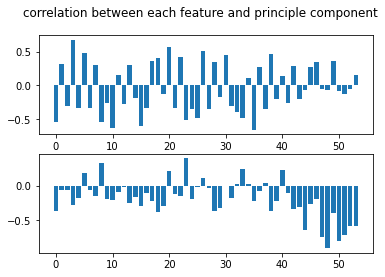

In [39]:
# Initiate PCA WITH TWO PCA COMPONENTS
pca = PCA(n_components=2)

#Compute the reduced-dimension matrix after PCA reducion with 2 components
reduced_per = pca.fit_transform(personality) 

#Compute loading matrix
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, 
                              columns = ['PC1', 'PC2'], 
                              index = personality.columns)

#Plot the loading matrix
fig, axs = plt.subplots(2)
fig.suptitle('correlation between each feature and principle component')
axs[0].bar(np.arange(len(personality.columns)),
        loading_matrix['PC1']);
axs[1].bar(np.arange(len(personality.columns)),
        loading_matrix['PC2']);

In the first plot, the fourth column, Is depressed/Blue, of the dataset is highly and positively correlated with the first pc; the 36th column, Is outgoing/sociable, of the dataset is highly but negatively correlated with the first pc. Therefore, we can conclude that the first pc focuses on whether the participant is introverted or extroverted. 

Similarly, the second plot shows the highly positively correlated column and the negatively correlated column are Is emotionally stable/not easily upset and  When watching a movie I feel like the things on the screen are happening to me respectively, which implies that the second pc focuses on emotions of participants.

**Plot the data from columns 421-474 in the new coordinate system, where each dot represents a person, and the axes represent the factors in the previous part.**

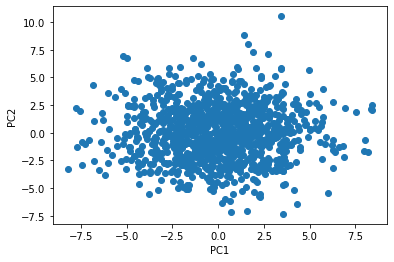

In [40]:
plt.scatter(reduced_per.T[0],
         reduced_per.T[1], 
         marker = 'o');
plt.xlabel('PC1');
plt.ylabel('PC2');

Next, we will identify clusters in this new space. Use a method of your choice by using k-means and determine the optimal number of clusters and identify which cluster a given user is part of.

In [41]:
#List to store cluster and intra cluster distance
clusters = []
inertia_vals = []

#Since creating one cluster is similar to observing the data as a whole, 
#multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(reduced_per)
    
#Append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

In order to determine the value of k, we set different values of k, more specifically, from 1 to 9, and see the silhouette score of each k-value.

In [42]:
for i in range(1,9,1):
    print(clusters[i])
    print("Silhouette score:",silhouette_score(reduced_per, 
                                               clusters[i].predict(reduced_per)))

KMeans(n_clusters=2, random_state=42)
Silhouette score: 0.32330837176001453
KMeans(n_clusters=3, random_state=42)
Silhouette score: 0.32738386238179307
KMeans(n_clusters=4, random_state=42)
Silhouette score: 0.31904663779720344
KMeans(n_clusters=5, random_state=42)
Silhouette score: 0.3170788285477651
KMeans(n_clusters=6, random_state=42)
Silhouette score: 0.33504888890155615
KMeans(n_clusters=7, random_state=42)
Silhouette score: 0.330732024902826
KMeans(random_state=42)
Silhouette score: 0.3438396508776126
KMeans(n_clusters=9, random_state=42)
Silhouette score: 0.3398277532607181


 We chose the k of 8 with the highest silhouette score of approximately 0.344.

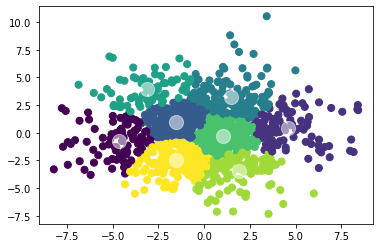

<Figure size 1440x1440 with 0 Axes>

In [43]:
#Initiate kmean WITH 8 CLUSTERS
kmeans = KMeans(n_clusters=8)
kmeans.fit(reduced_per)

y_kmeans = kmeans.predict(reduced_per)

plt.scatter(reduced_per[:, 0], reduced_per[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5);
plt.figure(figsize=(20,20));